# GPT-Models For SQL & Python

## Introduction

**Learning Goals:**

- Understand the scope of the notebook.
- Familiarize yourself with what GPT models can do in the context of SQL and Python.

## Setting Up the Environment

In this section, we'll import the required Python libraries and connect to a sample SQL database to prepare our environment for the tasks ahead.

In [1]:
import sqlite3
import pandas as pd

# Connect to the database
db_connection = sqlite3.connect('sample_warehouse.db')


In [2]:
pd.read_sql(sql = 'SELECT * FROM customers LIMIT 5',
            con = db_connection)

,customer_id,first_name,last_name,email
0,1,John,Doe,john.doe@example.com
1,2,Jane,Doe,jane.doe@example.com
2,3,Emily,Smith,emily.smith@example.com
3,4,Michael,Johnson,michael.johnson@example.com
4,5,Corey,Lara,acummings@thompson-bruce.biz


## Exploring the Database

Here, we'll explore the database's tables and their relationships. We'll use SQL queries to get a better understanding of the data structure.

In [3]:
# Connect to the SQLite database
cursor = db_connection.cursor()

# Query to get all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables

[('customers',), ('sqlite_sequence',), ('products',), ('date',), ('sales',)]

In [4]:
def list_tables_and_relationships(conn):
    cursor = conn.cursor()

    # Fetch all table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    # Dictionary to store table relationships
    relationships = {}

    # Loop through tables to find their relationships
    for table in tables:
        table = table[0]
        cursor.execute(f"PRAGMA foreign_key_list({table});")
        foreign_keys = cursor.fetchall()

        # Each item in foreign_keys is a tuple containing information about foreign keys.
        # For example: (0, 'main', 'products', 'product_id', 'product_id', 'NO ACTION', 'NO ACTION', 'NONE')
        relationships[table] = []
        for fk in foreign_keys:
            relationships[table].append({
                'table': fk[2],
                'from_column': fk[3],
                'to_column': fk[4]
            })

    # Close the connection
    conn.close()

    return relationships

def list_table_schemas(conn):
    cursor = conn.cursor()

    # Fetch all table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    # Dictionary to store table schemas
    schemas = {}

    # Loop through tables to find their columns and types
    for table in tables:
        table = table[0]
        cursor.execute(f"PRAGMA table_info({table});")
        columns = cursor.fetchall()

        # Each item in columns is a tuple containing information about the column.
        schemas[table] = []
        for column in columns:
            schemas[table].append({
                'name': column[1],
                'type': column[2]
            })

    return schemas

## Use Case 1: ChatGPT for Code Explanation

This section focuses on how ChatGPT can assist in explaining Python and SQL code.

Copy & paste the following prompt into ChatGPT following by the code you want explanations for:

```
ROLE: You're a world-class Python tutor.
TASK: Walk me through the Python code I give you. Explain it step by step. My Python level is Novice.
FORMAT: Return a chunk of code, followed by an explanation appropriate to my experience level in non-technical language. Skip the pre and post text.

Here's the code:
```

In [5]:
# Fetch and display the schemas
schemas = list_table_schemas(db_connection)
schemas

{'customers': [{'name': 'customer_id', 'type': 'INTEGER'},
  {'name': 'first_name', 'type': 'TEXT'},
  {'name': 'last_name', 'type': 'TEXT'},
  {'name': 'email', 'type': 'TEXT'}],
 'sqlite_sequence': [{'name': 'name', 'type': ''},
  {'name': 'seq', 'type': ''}],
 'products': [{'name': 'product_id', 'type': 'INTEGER'},
  {'name': 'product_name', 'type': 'TEXT'},
  {'name': 'price', 'type': 'REAL'}],
 'date': [{'name': 'date_id', 'type': 'INTEGER'},
  {'name': 'day', 'type': 'INTEGER'},
  {'name': 'month', 'type': 'INTEGER'},
  {'name': 'year', 'type': 'INTEGER'}],
 'sales': [{'name': 'sale_id', 'type': 'INTEGER'},
  {'name': 'customer_id', 'type': 'INTEGER'},
  {'name': 'product_id', 'type': 'INTEGER'},
  {'name': 'date_id', 'type': 'INTEGER'},
  {'name': 'amount', 'type': 'REAL'}]}

In [6]:
# Fetch and display the relationships
relationships = list_tables_and_relationships(db_connection)
relationships

{'customers': [],
 'sqlite_sequence': [],
 'products': [],
 'date': [],
 'sales': [{'table': 'date', 'from_column': 'date_id', 'to_column': 'date_id'},
  {'table': 'products',
   'from_column': 'product_id',
   'to_column': 'product_id'},
  {'table': 'customers',
   'from_column': 'customer_id',
   'to_column': 'customer_id'}]}

* The customers, products, and date tables do not have any foreign key relationships pointing to other tables.

* The sales table has foreign keys that establish relationships with the following tables:
  * A foreign key relationship to the date table through the date_id column.
  * A foreign key relationship to the products table through the product_id column.
  * A foreign key relationship to the customers table through the customer_id column.

## Use Case 2: Automating SQL Code Generation with GPT

In this section, we'll see how GPT models can assist in generating SQL code. We'll also go through the setup process for using OpenAI's API.

In [ ]:
# Set the API key
import os
api_key = input("Enter your API key: ")
os.environ["API_KEY"] = api_key

In [8]:
# Install openai package
pip install openai

In [10]:
# Import openai package and register API key
import openai
openai.api_key = os.getenv("API_KEY")

In [11]:
# Define system prompt

system_prompt = """

ROLE: You are a SQL expert.

TASK: I'll give you the list of tables and relationships of my SQLite database.
You will take my natural langauge query and translate it into a functional SQL query for this database.

CONTEXT: ## Tables and relationships in triple backticks:
```
{'customers': [],
 'sqlite_sequence': [],
 'products': [],
 'date': [],
 'sales': [{'table': 'date', 'from_column': 'date_id', 'to_column': 'date_id'},
  {'table': 'products',
   'from_column': 'product_id',
   'to_column': 'product_id'},
  {'table': 'customers',
   'from_column': 'customer_id',
   'to_column': 'customer_id'}]}
```

## Table schemas in triple backticks:
```
{'customers': [{'name': 'customer_id', 'type': 'INTEGER'},
  {'name': 'first_name', 'type': 'TEXT'},
  {'name': 'last_name', 'type': 'TEXT'},
  {'name': 'email', 'type': 'TEXT'}],
 'sqlite_sequence': [{'name': 'name', 'type': ''},
  {'name': 'seq', 'type': ''}],
 'products': [{'name': 'product_id', 'type': 'INTEGER'},
  {'name': 'product_name', 'type': 'TEXT'},
  {'name': 'price', 'type': 'REAL'}],
 'date': [{'name': 'date_id', 'type': 'INTEGER'},
  {'name': 'day', 'type': 'INTEGER'},
  {'name': 'month', 'type': 'INTEGER'},
  {'name': 'year', 'type': 'INTEGER'}],
 'sales': [{'name': 'sale_id', 'type': 'INTEGER'},
  {'name': 'customer_id', 'type': 'INTEGER'},
  {'name': 'product_id', 'type': 'INTEGER'},
  {'name': 'date_id', 'type': 'INTEGER'},
  {'name': 'amount', 'type': 'REAL'}]}
```

OUTPUT: Return only the SQL query. Skip pre- and post text.

"""

Run the first simple SQL query:

In [12]:
completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "How many customers are in the system?"}
  ],
  temperature=0.0,
)

print(completion)

{
  "id": "chatcmpl-87h9vVVc77ihNpYOd3HC4KkRg86uf",
  "object": "chat.completion",
  "created": 1696844891,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "SELECT COUNT(*) FROM customers;"
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 461,
    "completion_tokens": 6,
    "total_tokens": 467
  }
}


Extract the SQL query from the completion object

In [13]:
print(completion.choices[0].message.content)

SELECT COUNT(*) FROM customers;


In [14]:
sql_query = completion.choices[0].message.content
sql_query

'SELECT COUNT(*) FROM customers;'

### Run script inside Python code

In [15]:
pd.read_sql(sql = sql_query,
            con = db_connection)

,COUNT(*)
0,54


Pull it all together to a single function for easier use:

In [17]:
def sql_gpt(natural_language_query):
  system_prompt = """

  ROLE: You are a SQL expert.

  TASK: I'll give you the list of tables and relationships of my SQLite database.
  You will take my natural langauge query and translate it into a functional SQL query for this database.

  CONTEXT: ## Tables and relationships in triple backticks:
  ```
  {'customers': [],
  'sqlite_sequence': [],
  'products': [],
  'date': [],
  'sales': [{'table': 'date', 'from_column': 'date_id', 'to_column': 'date_id'},
    {'table': 'products',
    'from_column': 'product_id',
    'to_column': 'product_id'},
    {'table': 'customers',
    'from_column': 'customer_id',
    'to_column': 'customer_id'}]}
  ```

  ## Table schemas in triple backticks:
  ```
  {'customers': [{'name': 'customer_id', 'type': 'INTEGER'},
    {'name': 'first_name', 'type': 'TEXT'},
    {'name': 'last_name', 'type': 'TEXT'},
    {'name': 'email', 'type': 'TEXT'}],
  'sqlite_sequence': [{'name': 'name', 'type': ''},
    {'name': 'seq', 'type': ''}],
  'products': [{'name': 'product_id', 'type': 'INTEGER'},
    {'name': 'product_name', 'type': 'TEXT'},
    {'name': 'price', 'type': 'REAL'}],
  'date': [{'name': 'date_id', 'type': 'INTEGER'},
    {'name': 'day', 'type': 'INTEGER'},
    {'name': 'month', 'type': 'INTEGER'},
    {'name': 'year', 'type': 'INTEGER'}],
  'sales': [{'name': 'sale_id', 'type': 'INTEGER'},
    {'name': 'customer_id', 'type': 'INTEGER'},
    {'name': 'product_id', 'type': 'INTEGER'},
    {'name': 'date_id', 'type': 'INTEGER'},
    {'name': 'amount', 'type': 'REAL'}]}
  ```

  OUTPUT: Return only the SQL query. Skip pre- and post text.

  """
  completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": str(natural_language_query)}
  ],
  temperature=0.0
  )
  print(completion.choices[0].message.content)
  return(completion.choices[0].message.content)

### Try it out:

**Question**
<blockquote>How many customers are in the database?</blockquote>

In [42]:
pd.read_sql(sql = sql_gpt(input()),
            con = db_connection)

How many customers are in the database?


,COUNT(*)
0,54


**Question:**
<blockquote>When did the last sale happen?</blockquote>

In [44]:
pd.read_sql(sql = sql_gpt(input()),
            con = db_connection)

When did the last sale happen?


,MAX(date.year),MAX(date.month),MAX(date.day)
0,2023,1,31


**Question:**
<blockquote>When did the first sale happen?</blockquote>

In [45]:
pd.read_sql(sql = sql_gpt(input()),
            con = db_connection)

When did the first sale happen?


,MIN(day),MIN(month),MIN(year)
0,1,1,2023


**Question:**
<blockquote>How much did we sell on 15/01/2023?</blockquote>

In [49]:
pd.read_sql(sql = sql_gpt(input()),
            con = db_connection)

How much did we sell on 15/01/2023?
SELECT SUM(amount) 
FROM sales 
JOIN date ON sales.date_id = date.date_id 
WHERE day = 15 AND month = 1 AND year = 2023;


,SUM(amount)
0,21772.2597


**Question:**
<blockquote>Which customer did the highest sales?</blockquote>

In [50]:
pd.read_sql(sql = sql_gpt(input()),
            con = db_connection)

Which customer did the highest sales?
SELECT customers.first_name, customers.last_name
FROM customers
JOIN sales ON customers.customer_id = sales.customer_id
GROUP BY sales.customer_id
ORDER BY SUM(sales.amount) DESC
LIMIT 1;


,first_name,last_name
0,Barbara,Murray


### Return output as a new data frame

**Question:**
<blockquote>Give me a list of the top 10 customers orders depending by amount. Include first name, last name and total amount.</blockquote>


In [20]:
customers_df = pd.read_sql(sql = sql_gpt(input()), con = db_connection)

Give me a list of the top 10 customers orders depending by amount. Include first name, last name and total amount.
SELECT c.first_name, c.last_name, SUM(s.amount) as total_amount
FROM customers c
JOIN sales s ON c.customer_id = s.customer_id
GROUP BY c.customer_id
ORDER BY total_amount DESC
LIMIT 10;


In [21]:
customers_df

,first_name,last_name,total_amount
0,Barbara,Murray,8919.621054
1,Zoe,Hughes,8839.783989
2,Seth,Reid,8100.049504
3,Jane,Doe,7737.892352
4,John,Doe,7683.508202
5,Leroy,Evans,7583.337208
6,Holly,Mclaughlin,7393.094220
7,Justin,Harrington,7213.560863
8,Helen,Brown,6762.883192
9,Andrew,Mcknight,6757.403785


**Question:**
<blockquote>I want to know which product types are popular by customer. Show me the total of sales by product type for each customer.</blockquote>

In [18]:
products_df = pd.read_sql(sql = sql_gpt(input()), con = db_connection)

I want to know which product types are popular by customer. Show me the total of sales by product type for each customer.
SELECT customers.customer_id, products.product_name, SUM(sales.amount) as total_sales
FROM sales
JOIN customers ON sales.customer_id = customers.customer_id
JOIN products ON sales.product_id = products.product_id
GROUP BY customers.customer_id, products.product_name;


In [22]:
products_df

,customer_id,product_name,total_sales
0,1,Camera,2071.531202
1,1,Laptop,2409.043864
2,1,Phone,2139.401815
3,1,TV,1063.531322
4,2,Camera,2345.252477
...,...,...,...
181,49,TV,1652.898348
182,50,Camera,2185.883877
183,50,Laptop,546.915469
184,50,Phone,750.300776


## Use Case 3: GPT For Data Wrangling

This section is devoted to using GPT models for data wrangling tasks in Pandas. You'll discover how AI can assist in cleaning, transforming, and enriching your data for easier analysis.

In [ ]:
# Install Pandas AI
# Repo: https://github.com/gventuri/pandas-ai
!pip install pandasai

In [25]:
import pandas as pd
from pandasai import SmartDataframe

# Instantiate a LLM
from pandasai.llm import OpenAI
llm = OpenAI(api_token = os.getenv("API_KEY"))

sdf = SmartDataframe(products_df, config={"llm": llm})

### Chat with your dataframe

In [29]:
sdf.chat('Which product sold most?')

'The product sold most is TV.'

Return a dataframe

In [27]:
sdf.chat("Return the top 3 products by sales as a dataframe")

,product_name,total_sales
0,TV,76095.375536
1,Laptop,70976.574967
2,Phone,65932.735493


Print the code

In [30]:
print(sdf.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in temp_chart.png and do not show the chart.)
    At the end, return a dictionary of:
    - type (possible values "string", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Examples: 
        { "type": "string", "value": "The highest salary is $9,000." }
        or
        { "type": "number", "value": 125 }
        or
        { "type": "dataframe", "value": pd.DataFrame({...}) }
        or
        { "type": "plot", "value": "temp_chart.png" }
    """
    df = dfs[0]
    product_sales = df.groupby('product_name')['total_sales'].sum().reset_index()
    max_sales_product = product_sales.loc[produ

Manipulate the dataframe

In [33]:
sdf = sdf.chat("Replace total sales for customer ID 50 with NA")

Clean data

In [37]:
sdf.clean_data()

,customer_id,product_name,total_sales
0,1,Camera,2071.531202
1,1,Laptop,2409.043864
2,1,Phone,2139.401815
3,1,TV,1063.531322
4,2,Camera,2345.252477
...,...,...,...
177,48,TV,444.816770
178,49,Camera,1229.130590
179,49,Laptop,2751.317755
180,49,Phone,1949.990515


In [41]:
print(sdf.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in temp_chart.png and do not show the chart.)
    At the end, return a dictionary of:
    - type (possible values "string", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Examples: 
        { "type": "string", "value": "The highest salary is $9,000." }
        or
        { "type": "number", "value": 125 }
        or
        { "type": "dataframe", "value": pd.DataFrame({...}) }
        or
        { "type": "plot", "value": "temp_chart.png" }
    """
    df_cleaned = dfs[0].copy()
    df_cleaned.dropna(inplace=True)
    df_cleaned['total_sales'] = pd.to_numeric(df_cleaned['total_sales'], error

Missing value imputation

In [43]:
sdf.chat("Impute the missing values for total sales using the average for each product name")

,customer_id,product_name,total_sales
0,1,Camera,2071.531202
1,1,Laptop,2409.043864
2,1,Phone,2139.401815
3,1,TV,1063.531322
4,2,Camera,2345.252477
...,...,...,...
181,49,TV,1652.898348
182,50,Camera,1250.185852
183,50,Laptop,1531.079554
184,50,Phone,1417.009450


In [49]:
print(sdf.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in temp_chart.png and do not show the chart.)
    At the end, return a dictionary of:
    - type (possible values "string", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Examples: 
        { "type": "string", "value": "The highest salary is $9,000." }
        or
        { "type": "number", "value": 125 }
        or
        { "type": "dataframe", "value": pd.DataFrame({...}) }
        or
        { "type": "plot", "value": "temp_chart.png" }
    """
    df = dfs[0].copy()
    df['total_sales'] = df.groupby('product_name')['total_sales'].transform(lambda x: x.fillna(x.mean()))
    return {'typ

## Use Case 4: Create visuals

### With Pandas AI:

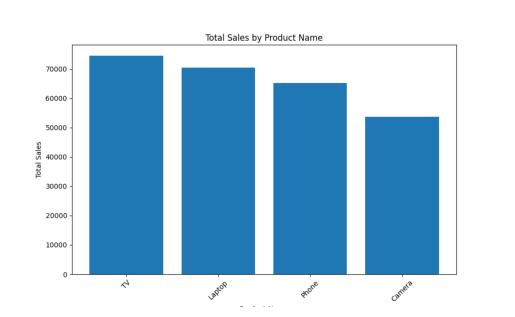

In [52]:
sdf.chat("Plot a barchart of the total_sales by product name, sort by total sales")

### Custom implementation

In [53]:
def visuals_gpt(natural_language_query, dataframe):

  df = dataframe
  system_prompt = """

  ROLE: You are a Python code generator.

  TASK: I'll give you a pandas dataframe and a description about a visualization I need for this data.
  You will take my description and translate it into functional Python code that works with the dataset I provided you.

  CONTEXT: ## My dataframe is called `df`. Here are the first 30 rows indicated in triple backticks:
  ```
  {}
  ```

  OUTPUT: Return ONLY the Python code in plain text, no markdown. Skip pre- and post text.

  """.format(dataframe.head(30))

  completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": str(natural_language_query)}
  ],
  temperature=0.0
  )
  script = completion.choices[0].message.content
  print(script)

  # Delete markdown backticks that often come with the output response
  # Split the multi-line string into a list of lines
  lines = script.strip().split('\n')

  # Check and remove the first line if it starts with a backtick
  if lines[0].startswith('`'):
      lines.pop(0)

  # Check and remove the last line if it starts with a backtick
  if lines[-1].startswith('`'):
      lines.pop(-1)

  # Join the list back into a multi-line string
  script = '\n'.join(lines)

  visual = exec(script)
  return(visual)

**Question:**
<blockquote>total sales by product as barchart, x-labels rotated 45 degrees, different colors by product name</blockquote>

total sales by product as barchart, x-labels rotated 45 degrees, different colors by product name
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and sum total_sales
product_sales = df.groupby('product_name')['total_sales'].sum().reset_index()

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='product_name', y='total_sales', data=product_sales)

# Rotate x-labels 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


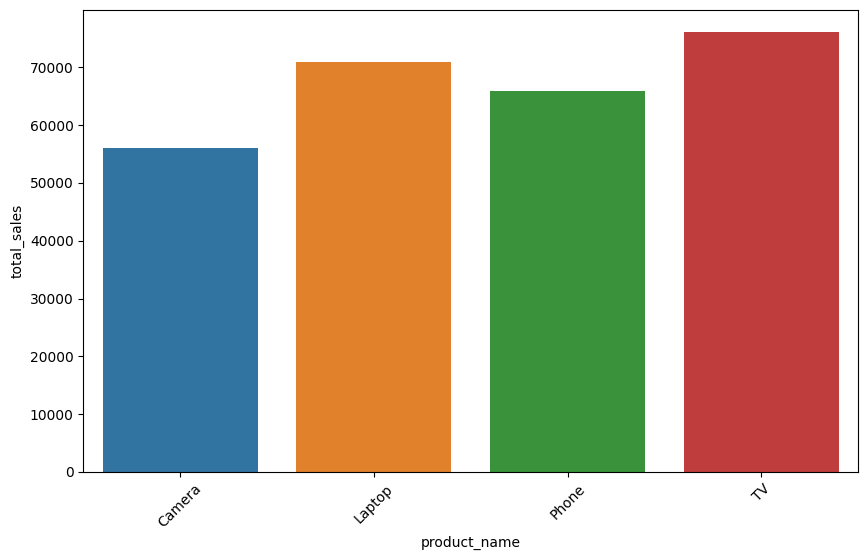

In [55]:
visuals_gpt(input(), products_df)

Advanced plotting

**Question:**
<blockquote>Barcharts sales by customer ID for the top 5 customers, grouped by product type</blockquote>

Barcharts sales by customer ID for the top 5 customers, grouped by product type
```python
import matplotlib.pyplot as plt

# Get the top 5 customers by total sales
top_5_customers = df.groupby('customer_id')['total_sales'].sum().nlargest(5).index

# Filter the dataframe to include only the top 5 customers
df_top_5 = df[df['customer_id'].isin(top_5_customers)]

# Create a pivot table for the bar chart
pivot = df_top_5.pivot_table(values='total_sales', index='customer_id', columns='product_name', aggfunc='sum')

# Plot the bar chart
pivot.plot(kind='bar', stacked=True)

plt.title('Sales by Customer ID for Top 5 Customers, Grouped by Product Type')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()
```


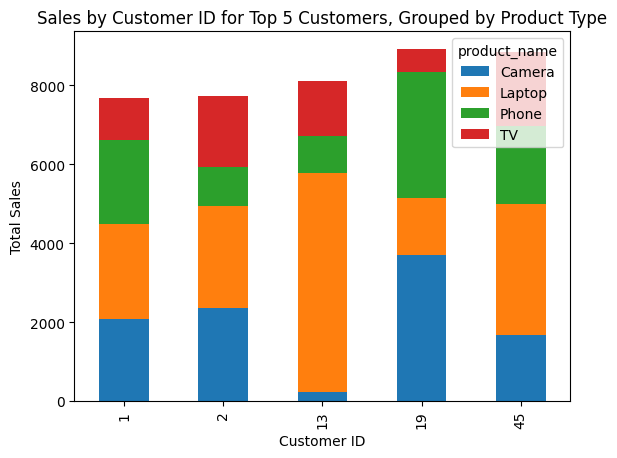

In [57]:
visuals_gpt(input(), products_df)

**Question:**
<blockquote>Draw a Scatterplot. x-axis = number of products sold, y-axis = total sales per product. One Point= product type</blockquote>

Draw a Scatterplot. x-axis = number of products sold, y-axis = total sales per product. One Point= product type
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and calculate the number of products sold
product_counts = df.groupby('product_name').size().reset_index(name='number_of_products_sold')

# Merge with the original dataframe to get total sales per product
merged_df = pd.merge(df, product_counts, on='product_name')

# Calculate total sales per product
total_sales_per_product = merged_df.groupby('product_name')['total_sales'].sum().reset_index()

# Merge with the merged_df to get the final dataframe
final_df = pd.merge(merged_df, total_sales_per_product, on='product_name', suffixes=('', '_per_product'))

# Draw the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='number_of_products_sold', y='total_sales_per_product', hue='product_name')
plt.title('Scatterplot of Number of Products Sold vs Total Sales per Product')
p

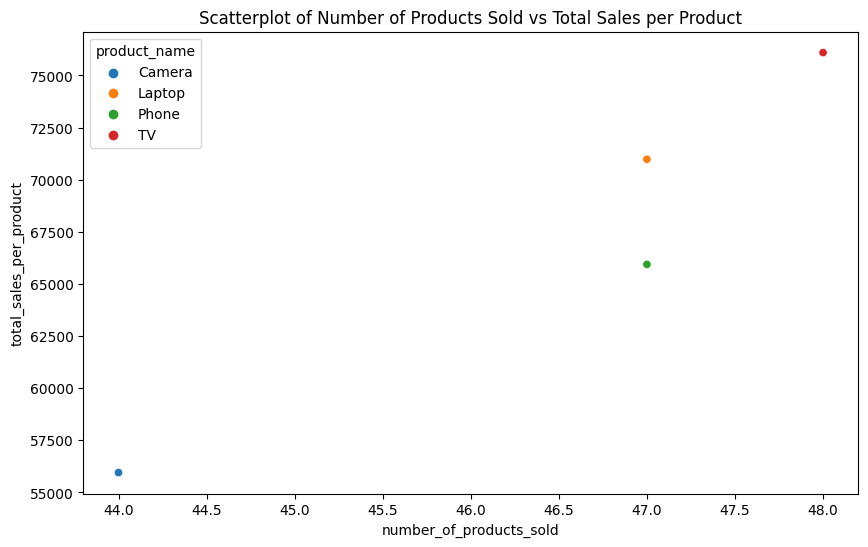

In [61]:
visuals_gpt(input(), products_df)

## Use Case 5 - Create an EDA

In [62]:
def eda_gpt(dataframe, target_col_name):

  df = dataframe
  system_prompt = f"""

  ROLE: You are a Python code generator.

  TASK: Please provide a detailed analysis of this dataframe, including summary statistics for each column, relationships with the target column, and suggestions for visualizations to better understand the data.

  CONTEXT: ## My dataframe is called `df`. The target column is {target_col_name}.  Here are the first 30 rows indicated in triple backticks:
  ```
  {dataframe.head(30)}
  ```

  OUTPUT: Return ONLY the Python code in plain text, no markdown. Skip pre- and post text.

  """

  completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": system_prompt}
  ],
  temperature=0.0
  )
  script = completion.choices[0].message.content
  print(script)

  # Delete markdown backticks
  # Split the multi-line string into a list of lines
  lines = script.strip().split('\n')

  # Check and remove the first line if it starts with a backtick
  if lines[0].startswith('`'):
      lines.pop(0)

  # Check and remove the last line if it starts with a backtick
  if lines[-1].startswith('`'):
      lines.pop(-1)

  # Join the list back into a multi-line string
  script = '\n'.join(lines)

  eda = exec(script)
  return(eda)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for each column
summary_stats = df.describe(include='all')
print(summary_stats)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Check the unique values in the target column 'product_name'
unique_products = df['product_name'].unique()
print(unique_products)

# Relationship with the target column
# Group the data by 'product_name' and calculate the mean of 'total_sales' and 'total_sales_per_customer'
grouped_data = df.groupby('product_name').mean()

# Visualizations
# Bar plot for 'total_sales' for each 'product_name'
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='total_sales', data=df)
plt.title('Total Sales for each Product')
plt.show()

# Box plot for 'total_sales_per_customer' for each 'product_name'
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_name', y='total_sales_per_customer', data=df)
plt.title('T

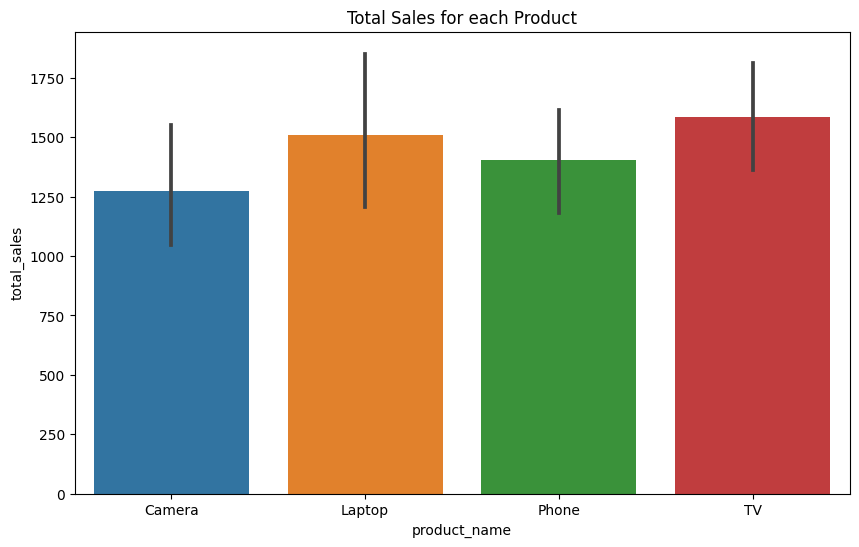

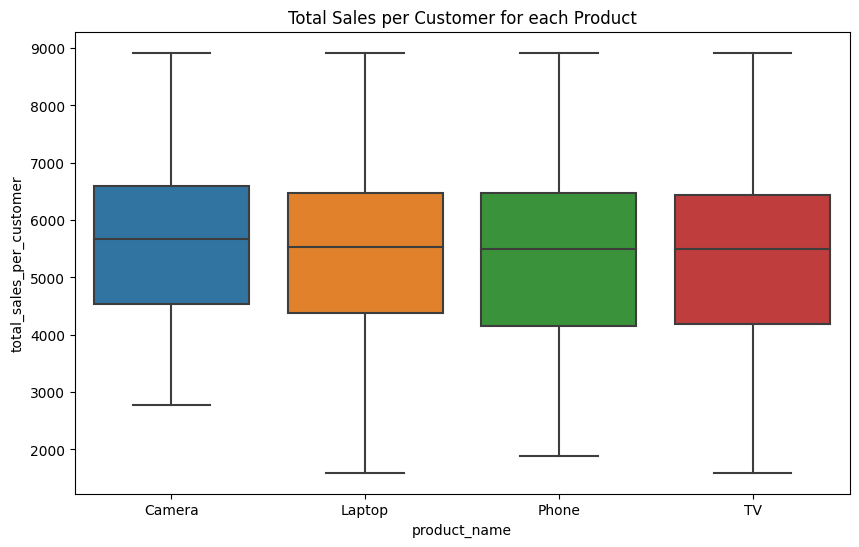

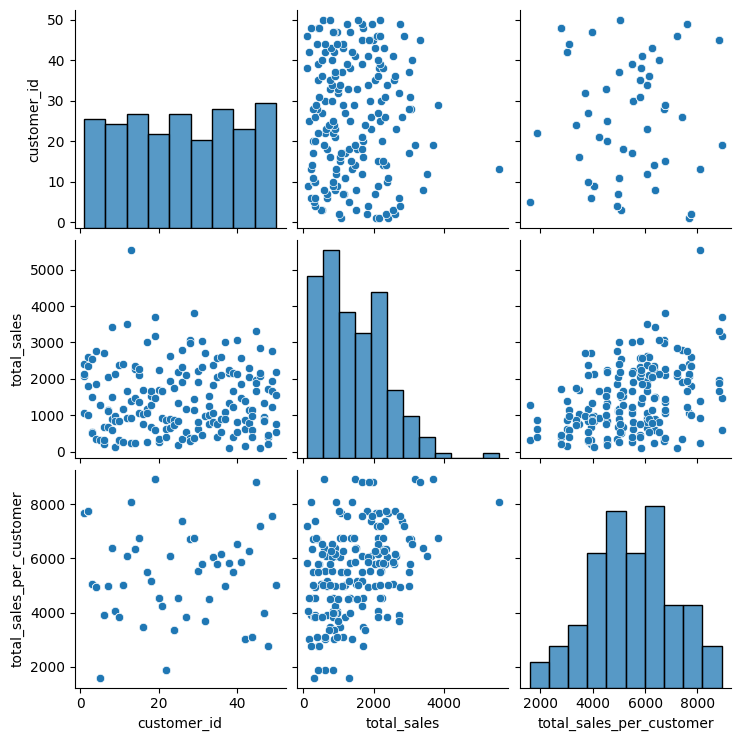

In [65]:
eda_gpt(products_df, "product_name")

## Limitations

* Always check your results!
* Remember: This is an augmented scenario!
* You're in charge.